In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
hcho_data = pd.read_csv('preprocessed_dataset/hcho_data.csv')
hcho_data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000263,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000263,Colombo Proper,2019-01-02,2019-01-03
4,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03


In [3]:
# Convert 'Current Date' to datetime format
hcho_data['Current Date'] = pd.to_datetime(hcho_data['Current Date'])

In [4]:
hcho_data.set_index('Current Date', inplace=True)
hcho_data.head()

,HCHO Reading,Location,Next Date
Current Date,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02
2019-01-01,0.000197,"Deniyaya, Matara",2019-01-02
2019-01-01,0.000263,Nuwara Eliya Proper,2019-01-02
2019-01-02,0.000263,Colombo Proper,2019-01-03
2019-01-02,0.000006,"Deniyaya, Matara",2019-01-03


In [5]:
hcho_data['Month'] = hcho_data.index.month
hcho_data['Year'] = hcho_data.index.year
hcho_data

,HCHO Reading,Location,Next Date,Month,Year
Current Date,,,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02,1,2019
2019-01-01,0.000197,"Deniyaya, Matara",2019-01-02,1,2019
2019-01-01,0.000263,Nuwara Eliya Proper,2019-01-02,1,2019
2019-01-02,0.000263,Colombo Proper,2019-01-03,1,2019
2019-01-02,0.000006,"Deniyaya, Matara",2019-01-03,1,2019
...,...,...,...,...,...
2023-12-30,0.000117,Jaffna Proper,2023-12-31,12,2023
2023-12-31,0.000117,"Bibile, Monaragala",2024-01-01,12,2023
2023-12-31,0.000065,Kurunegala Proper,2024-01-01,12,2023


### ARIMA

In [6]:
# # ARIMA model parameters
# p = range(0, 6)
# d = range(0, 5)
# q = range(0, 6)
# pdq = itertools.product(p, d, q)

# best_aic = float('inf')
# best_order = None

# # Define the training and testing sets
# train_size = int(len(hcho_data) * 0.6)
# train_data = hcho_data.iloc[:train_size]
# test_data = hcho_data.iloc[train_size:]

# # Iterate over various combinations of p, d, and q to find the best ARIMA model
# for order in pdq:
#     try:
#         model = ARIMA(train_data['HCHO Reading'], order=order)
#         results = model.fit()
#         aic = results.aic
#         if aic < best_aic:
#             best_aic = aic
#             best_order = order
#         print(f'ARIMA{order} - AIC: {aic:.2f}')
#     except:
#         continue

# print(f'Best ARIMA model: ARIMA{best_order} - AIC: {best_aic:.2f}')


In [40]:
# Define the training and testing sets
train_size = int(len(hcho_data) * 0.8)
train_data = hcho_data[:train_size]
test_data = hcho_data[train_size:]

best_order = (1, 0, 5)

model = ARIMA(train_data['HCHO Reading'], order=best_order)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           HCHO Reading   No. Observations:                10225
Model:                 ARIMA(1, 0, 5)   Log Likelihood               82708.349
Date:                Tue, 02 Apr 2024   AIC                        -165400.699
Time:                        18:08:16   BIC                        -165342.838
Sample:                             0   HQIC                       -165381.135
                              - 10225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   1.59e-06     75.368      0.000       0.000       0.000
ar.L1          0.6864   6.04e-11   1.14e+10      0.000       0.686       0.686
ma.L1         -0.2424    4.1e-11  -5.91e+09      0.000      -0.242      -0.242
ma.L2         -0.1053    1.6e-11  -6.57e+09      0.000      -0.105      -0.105
ma.L3          0.1024   3.36e-11   3.05e+09      0.000       0.102       0.102
ma.L4         -0.0609   1.56e-11  -3.91e+09      0.000      -0.061      -0.061
ma.L5         -0.0271   9.13e-13  -2.97e+10      0.000      -0.027      -0.027
sigma2      5.511e-09   5.72e-11     96.375      0.000     5.4e-09    5.62e-09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2664.04
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+27. Standard errors may be unstable.
"""

### FORECASTING

In [88]:
forecast_steps = len(test_data)
forecast = results.forecast(steps=forecast_steps)

print("Forecasted values:")
forecast

Forecasted values:


10225    0.000131
10226    0.000127
10227    0.000126
10228    0.000123
10229    0.000122
           ...   
12777    0.000120
12778    0.000120
12779    0.000120
12780    0.000120
12781    0.000120
Name: predicted_mean, Length: 2557, dtype: float64

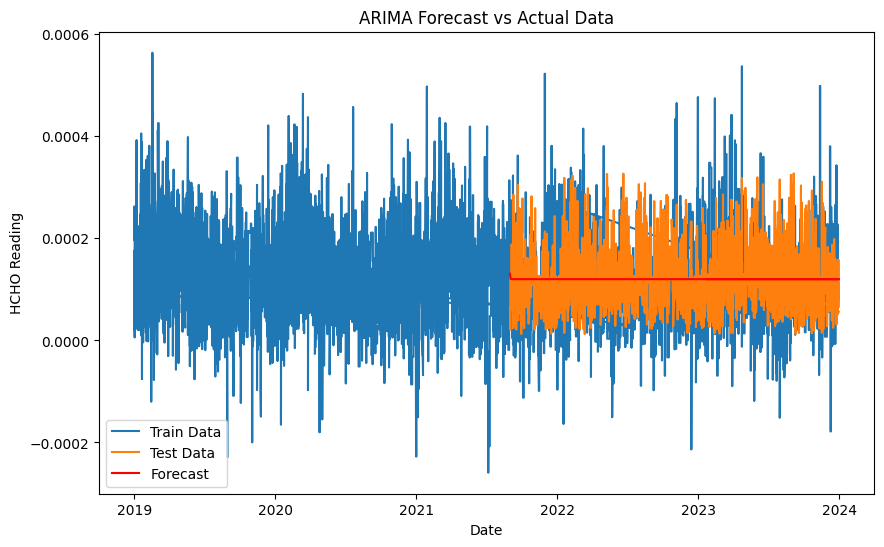

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['HCHO Reading'], label='Train Data')
plt.plot(test_data.index, test_data['HCHO Reading'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()

In [90]:
import plotly.graph_objects as go

fig = go.Figure()

# Adding training data to the figure
fig.add_trace(go.Scatter(
    x=train_data.index,
    y=train_data['HCHO Reading'],
    mode='lines',
    name='Train Data',
    line=dict(width=2, color='rgba(60, 88, 128, 0.7)'), 
))

# Adding test data to the figure
fig.add_trace(go.Scatter(
    x=test_data.index,
    y=test_data['HCHO Reading'],
    mode='lines',
    name='Test Data',
    line=dict(width=2, color='rgba(224, 76, 95, 0.7)'), 
))

# Adding forecast data to the figure
fig.add_trace(go.Scatter(
    x=test_data.index, 
    y=forecast,
    mode='lines',
    name='Forecast',
    line=dict(width=3, color='red', dash='dash'), 
))

# Adding vertical line to indicate start of forecast
fig.add_vline(x=test_data.index[0], line_width=2, line_dash="dash", line_color="green")

# Annotations for Train and Forecast
fig.add_annotation(
    x=train_data.index[int(len(train_data) / 2)],
    y=max(train_data['HCHO Reading']),
    text="<b>Training Data</b>",
    showarrow=False,
    font_size=12,
)

fig.add_annotation(
    x=test_data.index[int(len(test_data) / 2)],
    y=max(test_data['HCHO Reading']),
    text="<b>Forecast</b>",
    showarrow=False,
    font_size=12,
)

# Updating the axes and layout
fig.update_xaxes(title="Date", showgrid=False)
fig.update_yaxes(title="HCHO Reading", showgrid=False, type="linear")

fig.update_layout(
    width=840,
    height=540,
    title="HCHO Data: Training, Test, and Forecast",
    font_color='black', 
    title_font_size=18,
    plot_bgcolor='white', 
    paper_bgcolor='white', 
    legend=dict(yanchor="bottom", xanchor="right", y=1, x=1, orientation="h"),
)

fig.show()

In [91]:
# Converting the forecast to a pandas Series and ensuring it aligns with the test data's index
forecast_series = pd.Series(forecast, index=test_data.index)

# Calculating the MAE
mae = np.mean(np.abs(forecast_series - test_data['HCHO Reading']))
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): nan


In [92]:
print("Missing values in forecast:", forecast.isnull().sum())
print("Missing values in actual data:", test_data['HCHO Reading'].isnull().sum())

print("Length of forecast:", len(forecast))
print("Length of actual data:", len(test_data['HCHO Reading']))

print("Index of forecast:", test_data.index)
print("Index of actual data:", test_data['HCHO Reading'].index)

Missing values in forecast: 0
Missing values in actual data: 0
Length of forecast: 2557
Length of actual data: 2557
Index of forecast: DatetimeIndex(['2021-08-31', '2021-09-01', '2021-09-01', '2021-09-01',
               '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-03',
               '2021-09-03', '2021-09-03',
               ...
               '2023-12-29', '2023-12-29', '2023-12-29', '2023-12-30',
               '2023-12-30', '2023-12-30', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-01-24'],
              dtype='datetime64[ns]', name='Current Date', length=2557, freq=None)
Index of actual data: DatetimeIndex(['2021-08-31', '2021-09-01', '2021-09-01', '2021-09-01',
               '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-03',
               '2021-09-03', '2021-09-03',
               ...
               '2023-12-29', '2023-12-29', '2023-12-29', '2023-12-30',
               '2023-12-30', '2023-12-30', '2023-12-31', '2023-12-31',
               '2023-12-

In [93]:
forecast_df = pd.DataFrame(forecast, index=test_data.index)

forecast_aligned = forecast_df.reindex(test_data.index)

mae = np.mean(np.abs(forecast_aligned.squeeze() - test_data['HCHO Reading']))
print("\nMean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): nan


In [94]:
print("NaN values in forecast:", forecast_aligned.isnull().sum())
print("NaN values in actual data:", test_data.isnull().sum())

NaN values in forecast: predicted_mean    2557
dtype: int64
NaN values in actual data: HCHO Reading    0
Location        0
Next Date       0
Month           0
Year            0
dtype: int64


In [95]:
print("Forecast data:\n", forecast_aligned)
print("\nActual data:\n", test_data)

Forecast data:
               predicted_mean
Current Date                
2021-08-31               NaN
2021-09-01               NaN
2021-09-01               NaN
2021-09-01               NaN
2021-09-02               NaN
...                      ...
2023-12-30               NaN
2023-12-31               NaN
2023-12-31               NaN
2023-12-31               NaN
2023-01-24               NaN

[2557 rows x 1 columns]

Actual data:
               HCHO Reading            Location   Next Date  Month  Year
Current Date                                                           
2021-08-31        0.000065       Jaffna Proper  2021-09-01      8  2021
2021-09-01        0.000067  Bibile, Monaragala  2021-09-02      9  2021
2021-09-01        0.000022   Kurunegala Proper  2021-09-02      9  2021
2021-09-01        0.000126       Jaffna Proper  2021-09-02      9  2021
2021-09-02        0.000126  Bibile, Monaragala  2021-09-03      9  2021
...                    ...                 ...         ...    .

In [96]:
print("NaN values in training data:", train_data.isnull().sum())

try:
    model = ARIMA(train_data['HCHO Reading'], order=best_order)
    results = model.fit()
    print("Model fitting successful.")
except Exception as e:
    print("Error during model fitting:", e)

if 'results' in locals():
    forecast_steps = len(test_data)
    forecast = results.forecast(steps=forecast_steps)
    print("\nForecast data:\n", forecast)
else:
    print("\nModel fitting failed. Cannot generate forecast.")

NaN values in training data: HCHO Reading    0
Location        0
Next Date       0
Month           0
Year            0
dtype: int64
Model fitting successful.

Forecast data:
 10225    0.000131
10226    0.000127
10227    0.000126
10228    0.000123
10229    0.000122
           ...   
12777    0.000120
12778    0.000120
12779    0.000120
12780    0.000120
12781    0.000120
Name: predicted_mean, Length: 2557, dtype: float64


In [101]:
forecast_index = pd.date_range(start=test_data.index[0], periods=len(forecast), freq='MS')

forecast.index = forecast_index

print("Index of forecast data after conversion:\n", test_data.index)

Index of forecast data after conversion:
 DatetimeIndex(['2021-08-31', '2021-09-01', '2021-09-01', '2021-09-01',
               '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-03',
               '2021-09-03', '2021-09-03',
               ...
               '2023-12-29', '2023-12-29', '2023-12-29', '2023-12-30',
               '2023-12-30', '2023-12-30', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-01-24'],
              dtype='datetime64[ns]', name='Current Date', length=2557, freq=None)


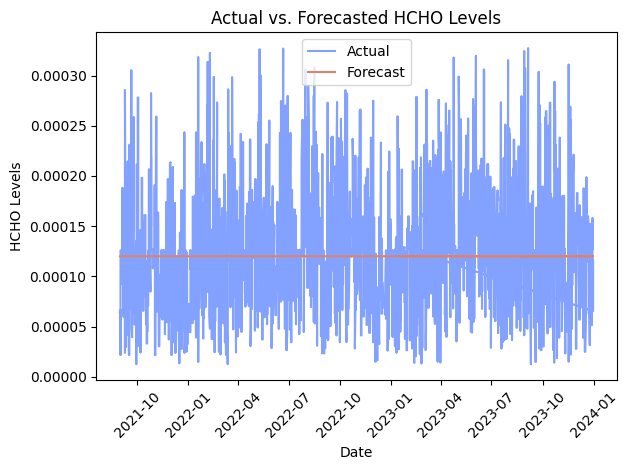

In [104]:
plt.plot(test_data.index, test_data['HCHO Reading'], color='#83A2FF', label='Actual')

plt.plot(test_data.index, forecast, color='#DF826C', label='Forecast')

plt.xlabel('Date')
plt.ylabel('HCHO Levels')
plt.title('Actual vs. Forecasted HCHO Levels')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### FUTURE FORECASTING

In [107]:
future_data = hcho_data['HCHO Reading']

model = ARIMA(future_data, order=(1, 0, 5))
fit_model = model.fit()

forecast_steps = 108 
forecast = fit_model.forecast(steps=forecast_steps)
print(forecast)

12782    0.000116
12783    0.000115
12784    0.000124
12785    0.000122
12786    0.000120
           ...   
12885    0.000121
12886    0.000121
12887    0.000121
12888    0.000121
12889    0.000121
Name: predicted_mean, Length: 108, dtype: float64


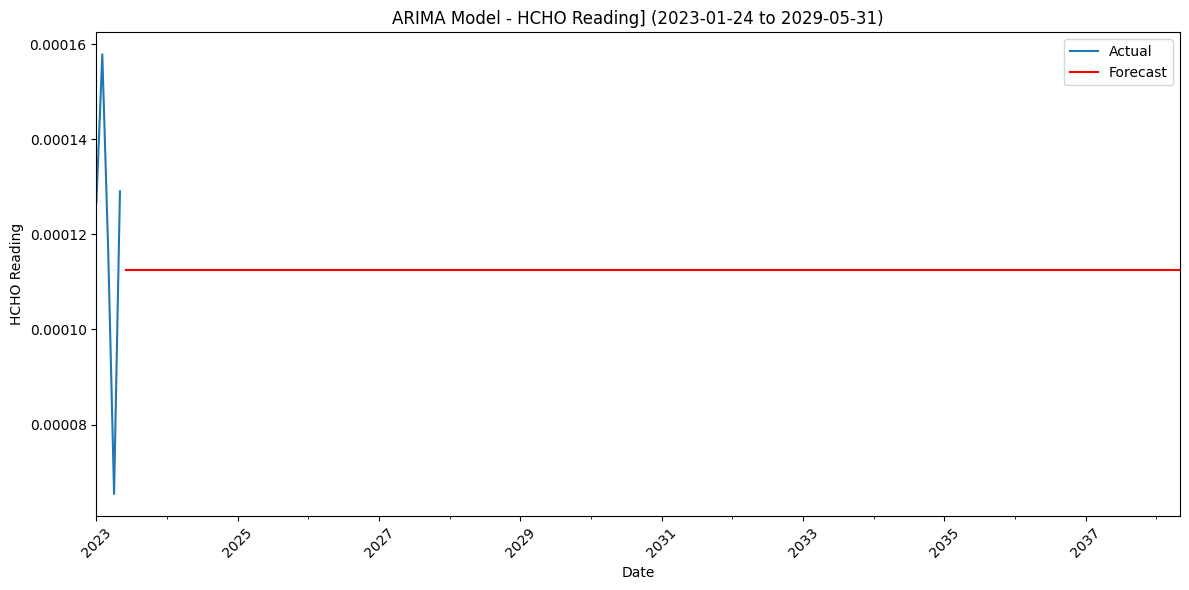

In [109]:
hcho_data = pd.DataFrame({'HCHO Reading': [0.00012672353729286647, 0.000157848076281027, 0.00011665895368421289, 0.00006540852992918962, 0.00012905545653340233]},
                      index=pd.date_range('2023-01-24', periods=5, freq='M'))

model = ARIMA(hcho_data['HCHO Reading'], order=(1, 0, 5))

fit_model = model.fit()

# Generate forecasts for the next 15 years (180 months)
forecast_steps = 180
forecast = fit_model.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
hcho_data['HCHO Reading'].plot(label='Actual')
forecast.plot(color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.title('ARIMA Model - HCHO Reading] (2023-01-24 to 2029-05-31)')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()